<a href="https://colab.research.google.com/github/Lovejeet-Singh-31/Retail-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#**Following are the 7 major steps of building Machine Learning Model** :
#1.   Collecting Data.
#2.   Preparing the Data
*   Exploratory Data Analysis.
*   feature engineering.


#3.   Choosing a Model
#4.   Training the Model.
#5.   Evaluating the Model.
#6.   Parameter Tuning.
#7.   Making Predictions.

#First thing first importing the necessary libraries for EDA and Machine learning algorithim to train our model. 
##Following are the libraries:-

1.   NumPy
2.   Pandas
3.   Matplotlib
4.   Seaborn
5.   Scikit Learn




In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pylab
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import math
from sklearn.ensemble import RandomForestRegressor
!pip install scikit-optimize
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn import ensemble
import lightgbm as lgb

from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 2.8 MB/s 


##Now we are ready to mount the google drive using following code

In [2]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**1.Collecting Data.**

#After mounting the gdrive we are ready to load our dataset.
we have two dataset.which is Rossmann Store data and Store data.In which we have diffrent store observations and its some information like sales store catagories etc.


In [3]:
#loading our Two Datasets
rossmann_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Retail Sales Prediction - Lovejeet Singh/Dataset/Copy of Rossmann Stores Data.csv')
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Retail Sales Prediction - Lovejeet Singh/Dataset/Copy of store.csv')

#**2.Preparing the Data**

##Now checking the shape of our DataFrames which helps to get an idea to know the number of rows and columns present in our both DataFrames.

In [ ]:
#Checking the Number of rows and columns using Shape methods
rossmann_df.shape, store_df.shape

((1017209, 9), (1115, 10))

##The Rossmann_df has 1017209 number of rows and 9 columns.
##The Store_df has 1115 number of rows and 10 column. 

#Using info() method we can easily get the idea of what kind of data type and null values inside our both dataframes we have.

In [ ]:
#checking the info 
rossmann_df.info(), store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assort

(None, None)

#as we can see that in our rossmann_df we have zero null values and in our Store_df we have too many null values.

##geting the total sum of null values present in each columns in our Store_df using isnull() function present in pandas library. 

In [ ]:
#calculating totall null values in our store dataframe
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

##we can see that we have 6 columns in which we have null values. so we have to find correct way to fll these null values.

##As the discription of columns shows the information.

*   CompetitionDistance - distance in meters to the nearest competitor store.

*   CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
*   Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
*   PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

so we observe from dataset that where the Promo2 has value equals to zero there are Nan values for these columns. That means the store which do not have promotion they have null values in promointerval , promo2sinceweek and so on.So for this purpose the best way to fill those features is to assign value equals to zero.

##Firstly we looking to treat null values in cometiondistance column by checking its distribution.

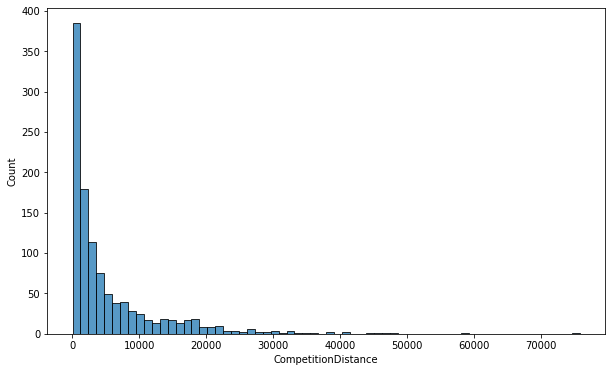

In [ ]:
#checking the disribution of CompetitionDistance column
plt.figure(figsize=(10,6))
sns.histplot(store_df['CompetitionDistance'])

#as we can see that the distribution look like right skewed distribution. so we dicided to fill null values with median 

In [4]:
#replacing Nan values in CompetitionDistance with median.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

#now the rest of the columns which has Nan values we simple put Zero as the columns descriptions shows.

In [5]:
## code for replacing Nan values with 0.


## Replacing Nan values with 0 in CompetitionOpenSinceMonth
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)

## Replacing Nan values with 0 in CompetitionOpenSinceYear
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceWeek
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceYear
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

#Now checking the Null values

In [ ]:
## Now checking Nan values
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

##Now we can see the numeric value and its aggregations like mean,mode,max and median using Describe method

In [ ]:
#checking the mean mode and median in rossman_df dataset using describe function
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#checking the mean mode and median in store_df dataset using describe function
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5396.614350,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,7654.513635,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2325.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


##Using head function we can get an glimps of our both dataset. 

In [ ]:
#using head() function we able to view top 5 rows 
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
#using head() function we able to view top 5 rows 
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


#Merge the Rossmann_df and Store_df by column 'Store' as in both csv Store column is common.

In [6]:
#mearging the two dataset using pd.merge funtion.
merge_rossman_store_df = pd.merge(rossmann_df, store_df, on='Store', how='left')
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
#checking the shape
merge_rossman_store_df.shape

(1017209, 18)

#Now we have 1017209 numner of rows and 18 columns.

In [ ]:
#checking the info/ datatype in our merged dataframe
merge_rossman_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

#As we can see that many columns our in object datatype so we have to check the datatype of thses column because our machine learning algorithms only takes numberical values.

# first we have date column we have to separate the date, month and year from that.

In [7]:
#creating new variable date month and year from Date column 
merge_rossman_store_df['year'] = merge_rossman_store_df['Date'].apply(lambda x: x.split('-')[0])
merge_rossman_store_df['month'] = merge_rossman_store_df['Date'].apply(lambda x: x.split('-')[1])
merge_rossman_store_df['date'] = merge_rossman_store_df['Date'].apply(lambda x: x.split('-')[2])

In [ ]:
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,07,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,0.0,0.0,0,2015,07,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,07,31


#So as we have catagorical values in StateHoliday so we can use pd.getdummies to create dummies variable. 

In [ ]:
#calculation value counts using value_counts() funtion
merge_rossman_store_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [8]:
merge_rossman_store_df.loc[merge_rossman_store_df['StateHoliday'] == '0', 'StateHoliday'] = 0

In [ ]:
merge_rossman_store_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [9]:
# One hot encoding
merge_rossman_store_df = pd.get_dummies(merge_rossman_store_df, columns=["StateHoliday"],drop_first=True)

In [ ]:
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,c,a,...,0,0.0,0.0,0,2015,07,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,a,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,a,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,c,c,...,0,0.0,0.0,0,2015,07,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,a,a,...,0,0.0,0.0,0,2015,07,31,0,0,0


In [ ]:
merge_rossman_store_df['StateHoliday_a'].value_counts()

0    996949
1     20260
Name: StateHoliday_a, dtype: int64

#Now in Assortment column we have to levelized the catagorical value in a form of 0,1,2 which we give some weightage to model predictions.

In [ ]:
merge_rossman_store_df['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [10]:
# code for changing Assortment dtype from object to int.
merge_rossman_store_df['Assortment'] = np.where((merge_rossman_store_df['Assortment'] == 'a'),0,merge_rossman_store_df['Assortment'])
merge_rossman_store_df['Assortment'] = np.where((merge_rossman_store_df['Assortment'] == 'b'),1,merge_rossman_store_df['Assortment'])
merge_rossman_store_df['Assortment'] = np.where((merge_rossman_store_df['Assortment'] == 'c'),2,merge_rossman_store_df['Assortment'])

#Now in StoreType we did not use One hot encoding because if we done hone encoding which give equal weightage to our model. so as per domain knowledge we can labeled as 0,1,2,3 as store type.


*   store_type 0 means small store_type.
*   store_type 1 means medium store_type.

*   store_type 2 means large store_type.
*   store_type 3 means huge store_type.





In [ ]:
merge_rossman_store_df['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [11]:
#converting catagorical value into interger values based on store type class.
merge_rossman_store_df['StoreType'] = np.where((merge_rossman_store_df['StoreType'] == 'a'),0,merge_rossman_store_df['StoreType'])
merge_rossman_store_df['StoreType'] = np.where((merge_rossman_store_df['StoreType'] == 'b'),1,merge_rossman_store_df['StoreType'])
merge_rossman_store_df['StoreType'] = np.where((merge_rossman_store_df['StoreType'] == 'c'),2,merge_rossman_store_df['StoreType'])
merge_rossman_store_df['StoreType'] = np.where((merge_rossman_store_df['StoreType'] == 'd'),3,merge_rossman_store_df['StoreType'])

In [ ]:
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2,0,...,0,0.0,0.0,0,2015,07,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2,2,...,0,0.0,0.0,0,2015,07,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,...,0,0.0,0.0,0,2015,07,31,0,0,0


Some of the columns now showing when we use head().

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
merge_rossman_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,07,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0,2015,07,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,07,31,0,0,0


#lets check the info of our dataframe.

In [ ]:
merge_rossman_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

#As we can see that some of our features are in object datatype so we have to first convert into interger or float. so that our machine learning algorithm will understand these feature.

In [12]:
#converting object dtype to integer.
merge_rossman_store_df['year']= merge_rossman_store_df['year'].astype(int)
merge_rossman_store_df['month']= merge_rossman_store_df['month'].astype(int)
merge_rossman_store_df['date']= merge_rossman_store_df['date'].astype(int)
merge_rossman_store_df['StoreType']= merge_rossman_store_df['StoreType'].astype(int)
merge_rossman_store_df['Assortment']= merge_rossman_store_df['Assortment'].astype(int)

##making a copy of our processed dataset to prevent that if we mistakenly do some change via code like inplace = true .

In [13]:
final_df = merge_rossman_store_df.copy()

#**Exploratory Data Analysis**

In [ ]:
# Checking Duplicate Values
value=len(final_df[final_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [ ]:
#checking the first 5 rows of our dataframe
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31,0,0,0


#Our Target variable is Sales so we have to check the distrubution.

[Text(0.5, 1.0, 'Sales acording to Month ')]

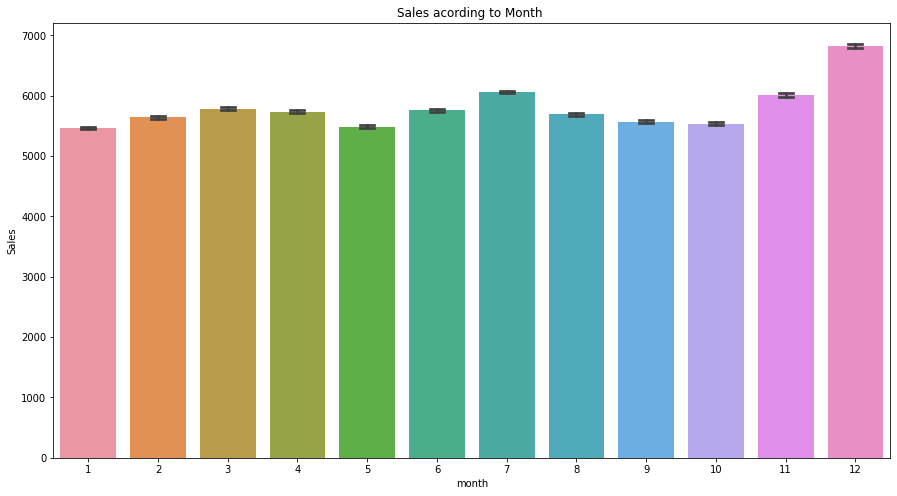

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='month',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales acording to Month ')

[Text(0.5, 1.0, 'Sales acording to Month ')]

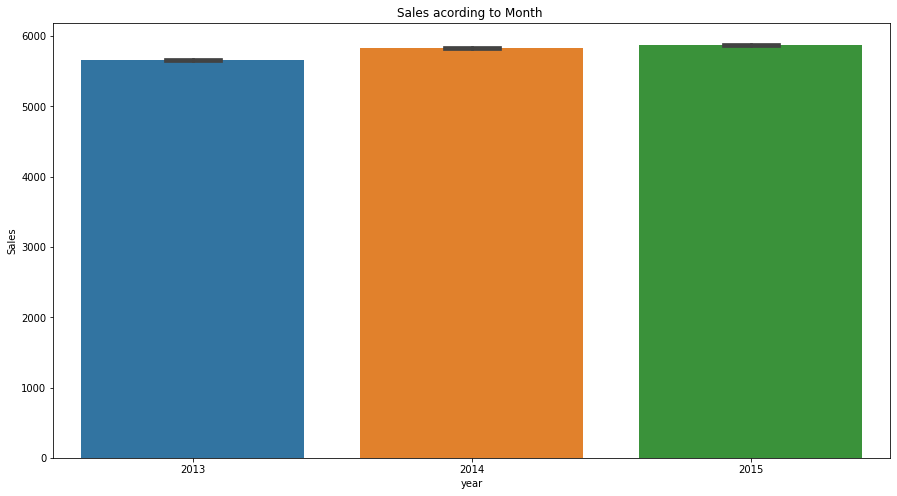

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='year',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales acording to Month ')

[Text(0.5, 1.0, 'Sales acording to Month ')]

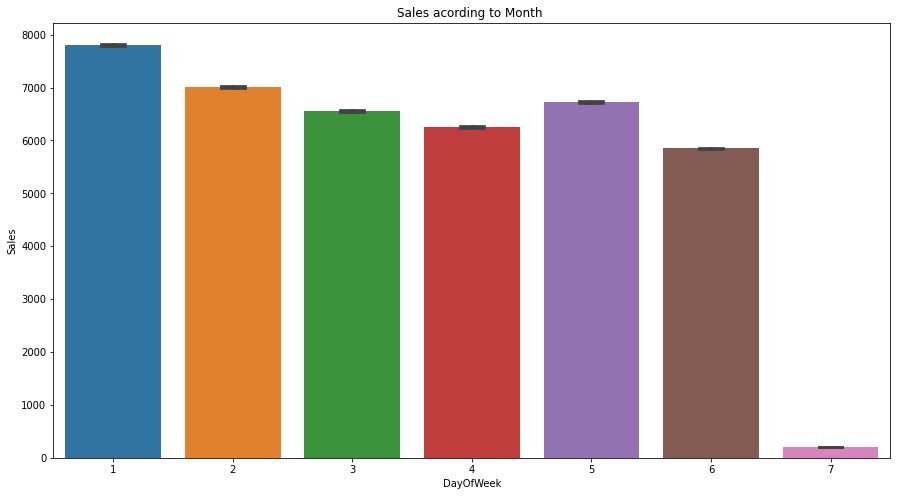

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='DayOfWeek',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales acording to Month ')

[Text(0.5, 1.0, 'Sales acording to Month ')]

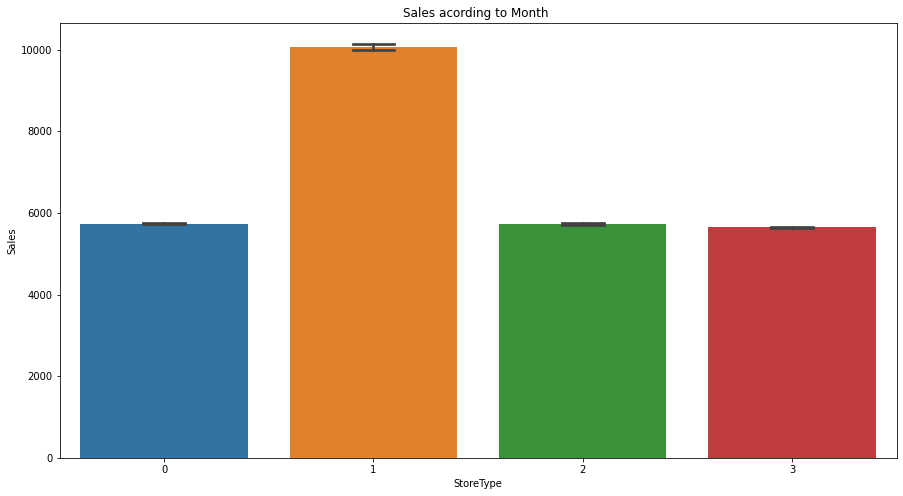

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='StoreType',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales acording to Month ')

[Text(0.5, 1.0, 'Sales acording to Month ')]

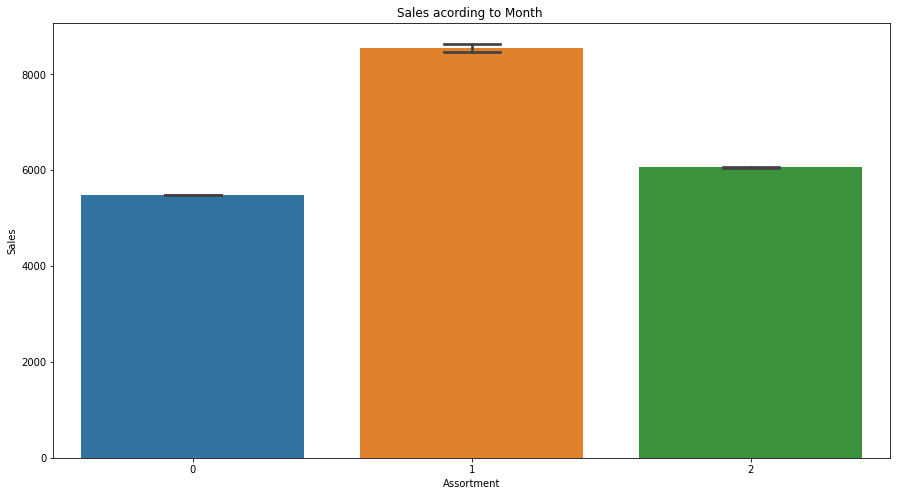

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='Assortment',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales acording to Month ')

[Text(0.5, 1.0, 'Sales acording to Month ')]

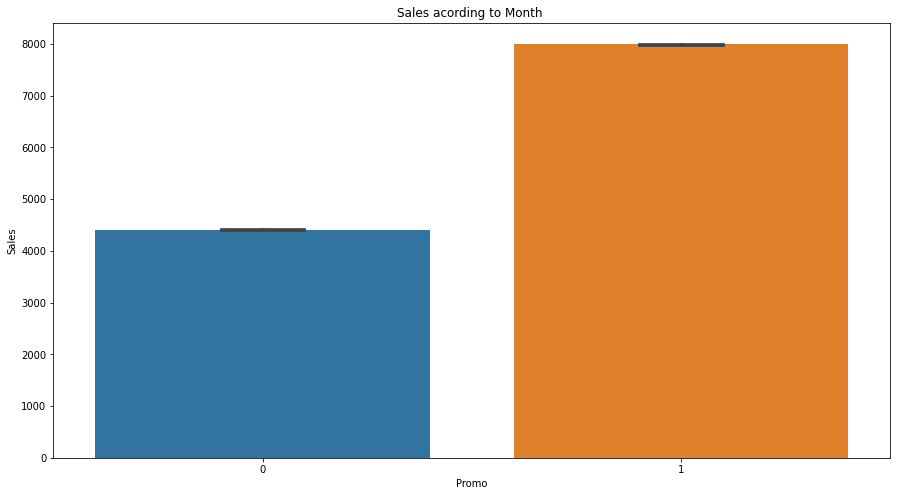

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='Promo',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales acording to Month ')

[Text(0.5, 1.0, 'Sales acording to Month ')]

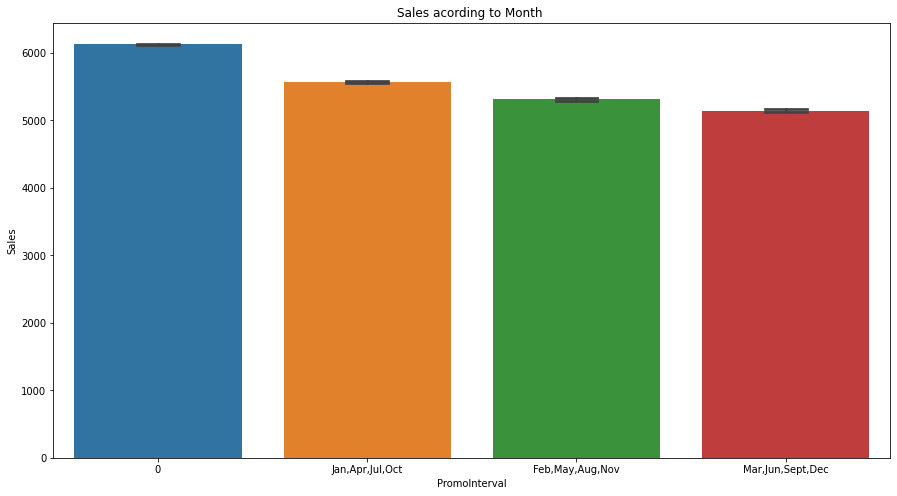

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='PromoInterval',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales acording to Month ')

#as we can see that our target variable 'Sales' look like normal distribution. 

#Now check the distribution of our each features

In [ ]:
numeric_features = list(final_df.describe().columns)
numeric_features

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'year',
 'month',
 'date',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c']

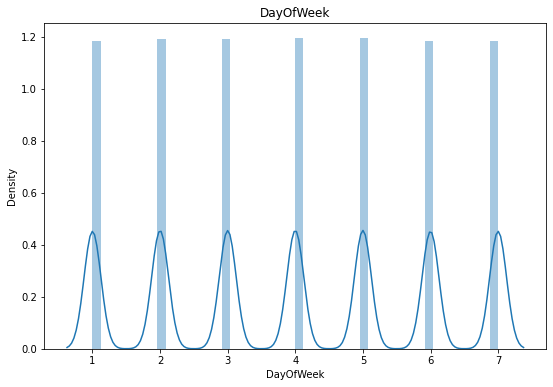

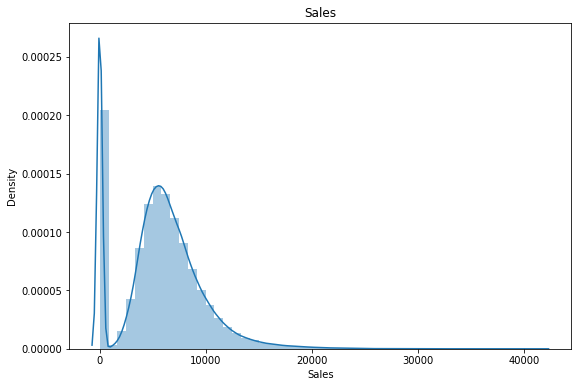

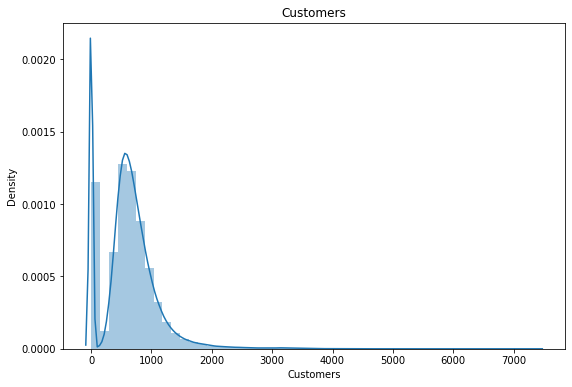

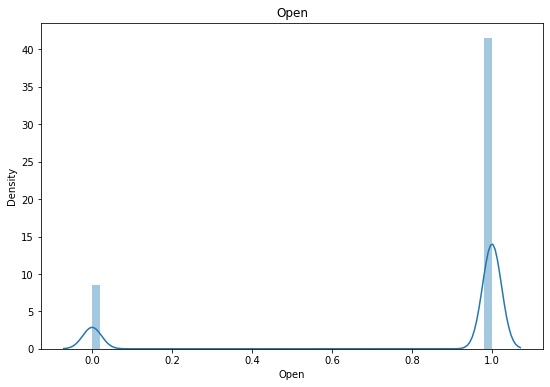

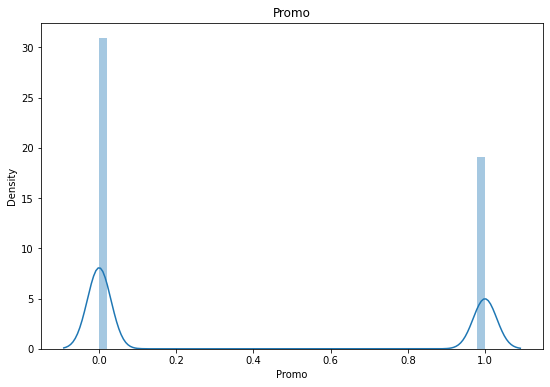

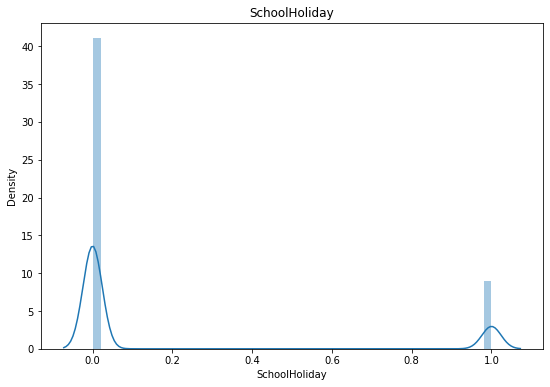

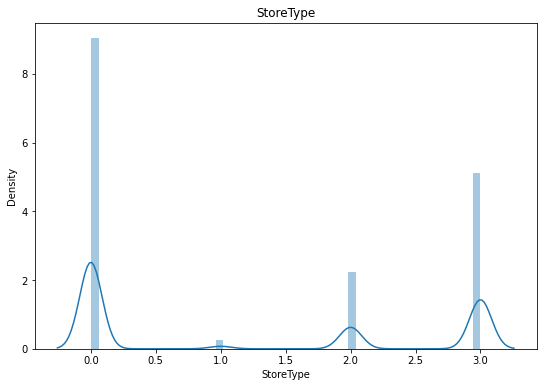

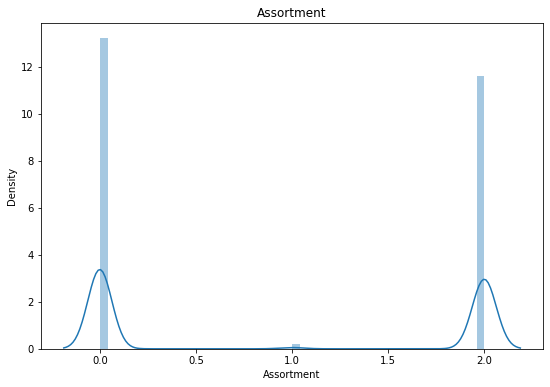

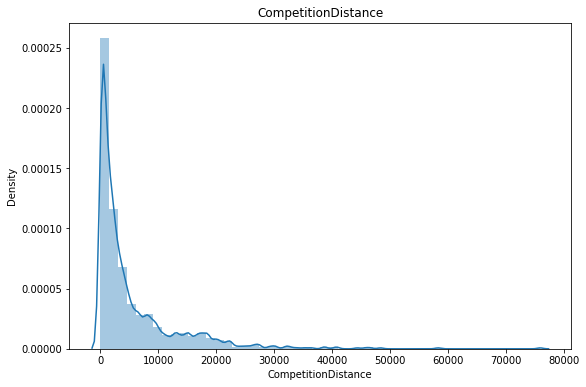

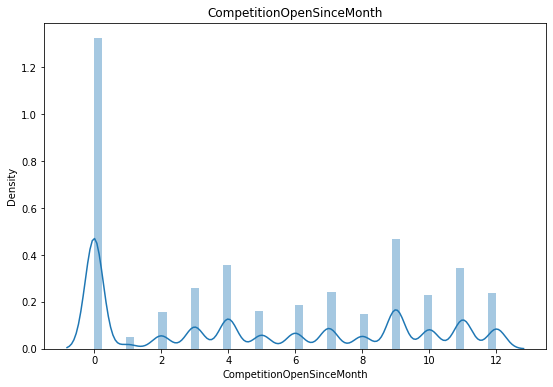

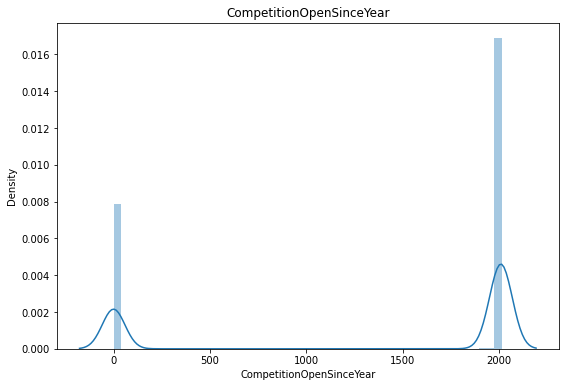

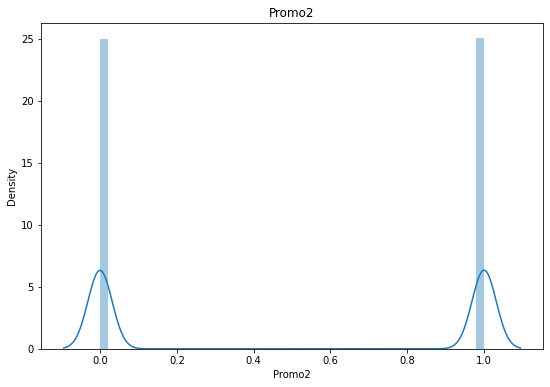

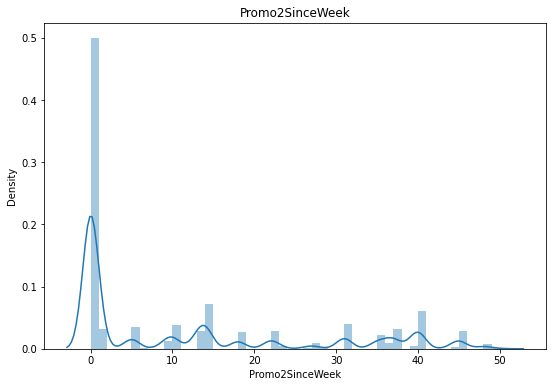

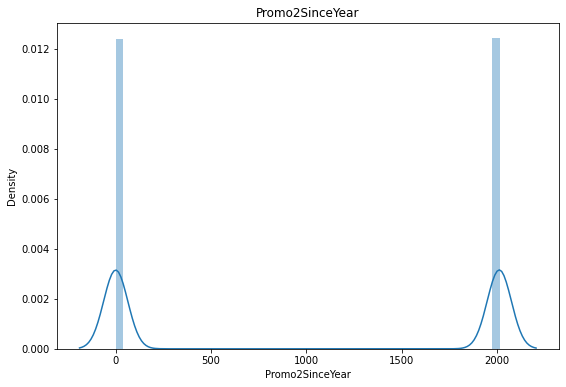

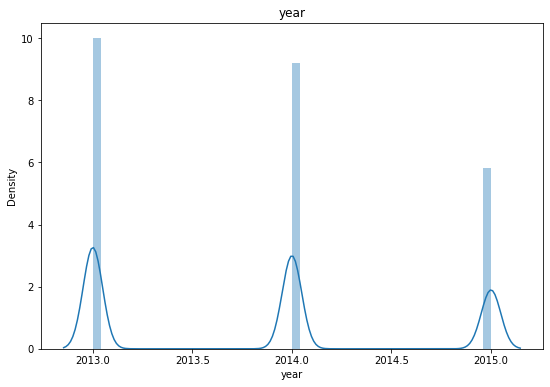

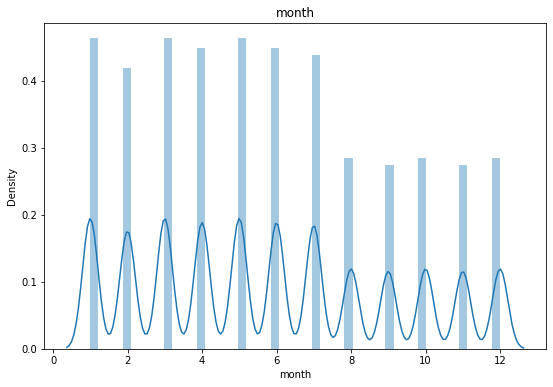

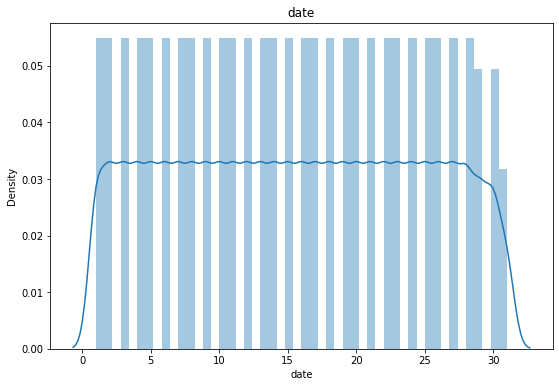

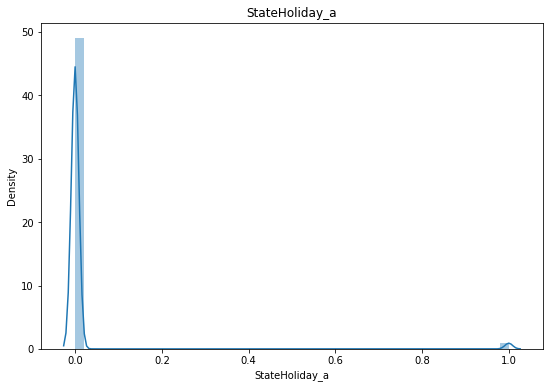

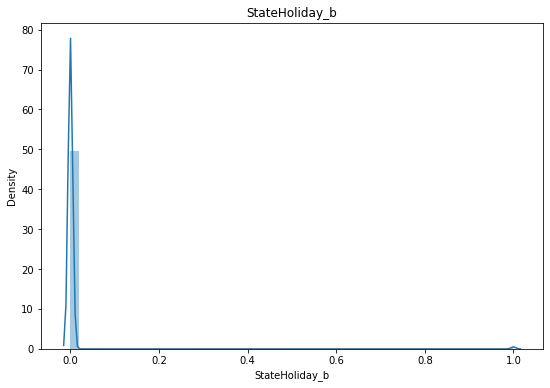

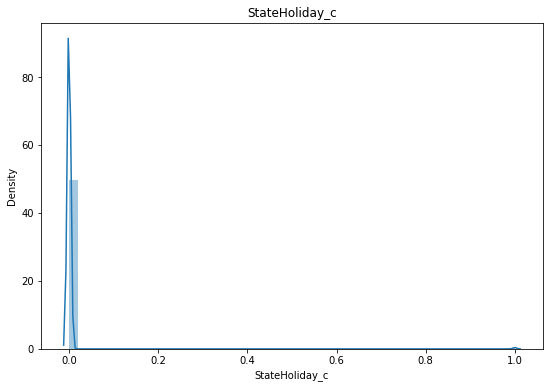

In [ ]:
#printing displots to analyze the distribution of all numerical features
# plot a bar plot for each numerical feature count (except store)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final_df[col]
    sns.distplot(feature,ax = ax)    
    ax.set_title(col)
plt.show()

#In the above charts we see that many features has catogorical value so its more look like skewed chart and rest of the feature also not normaly distributed. So by using log1p transformation we are able to make our distribution more closer to look like normal distribution.


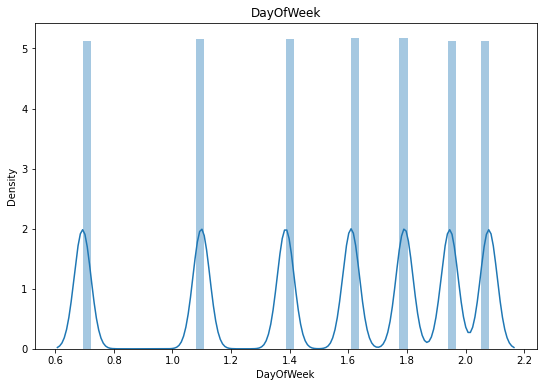

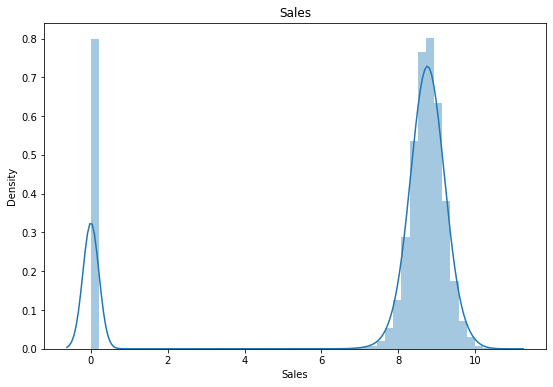

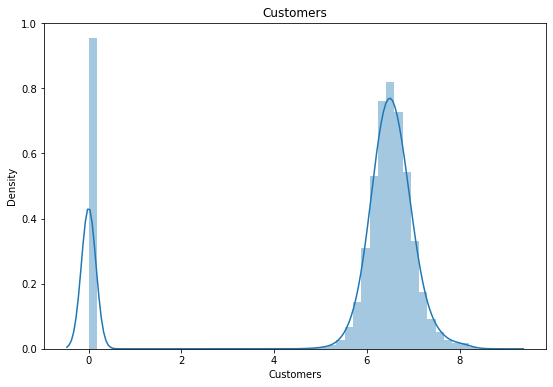

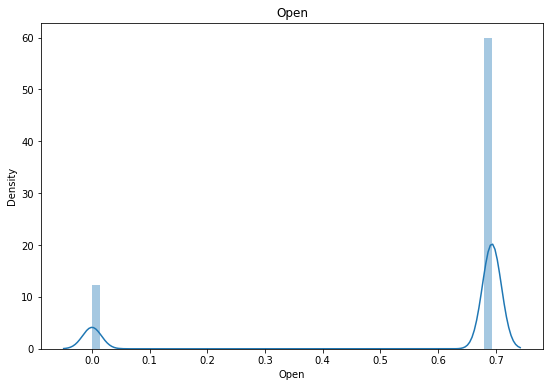

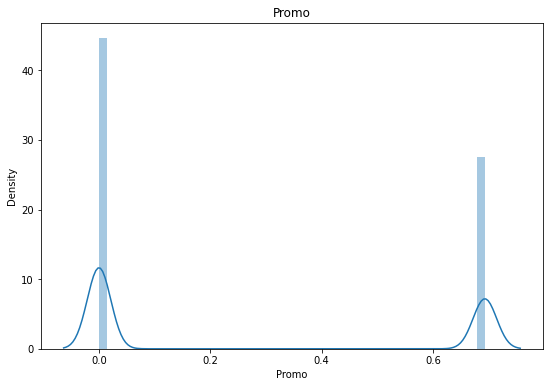

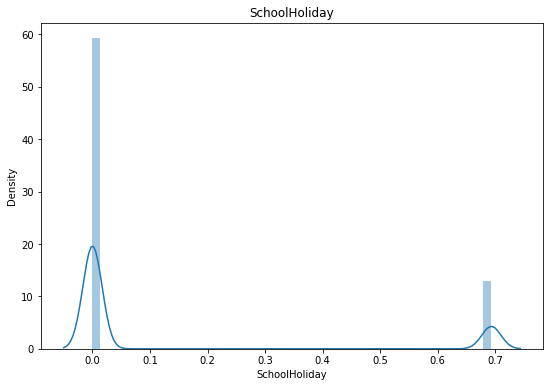

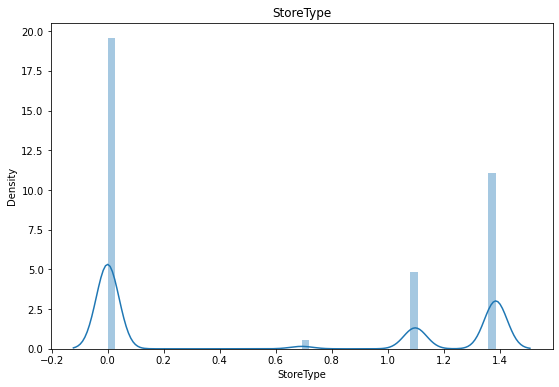

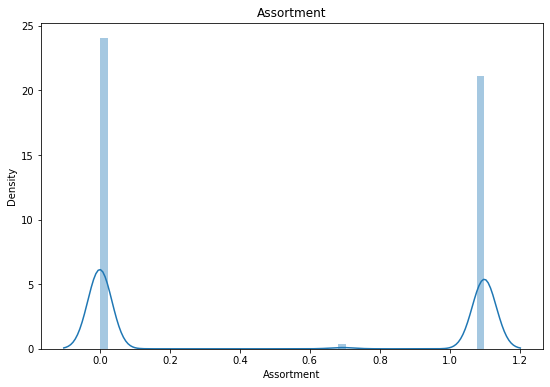

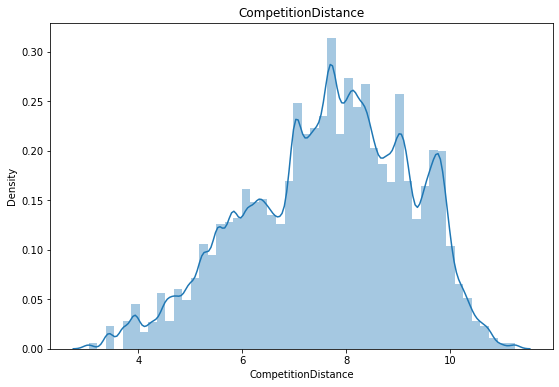

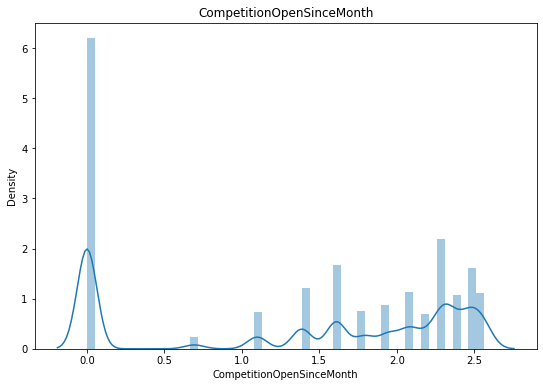

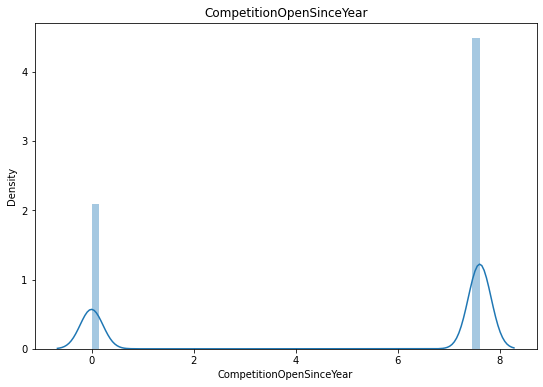

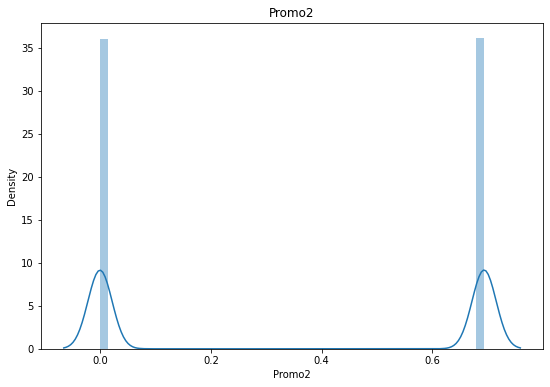

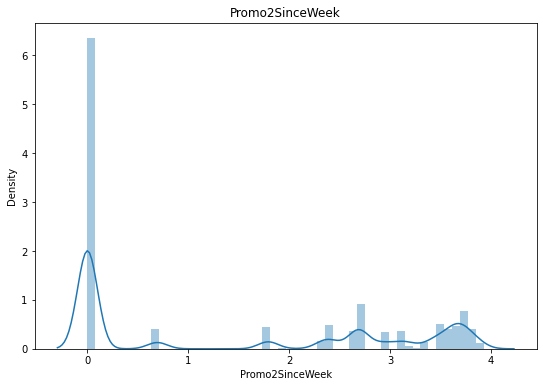

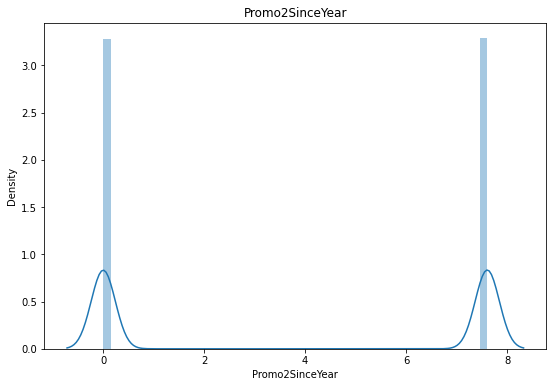

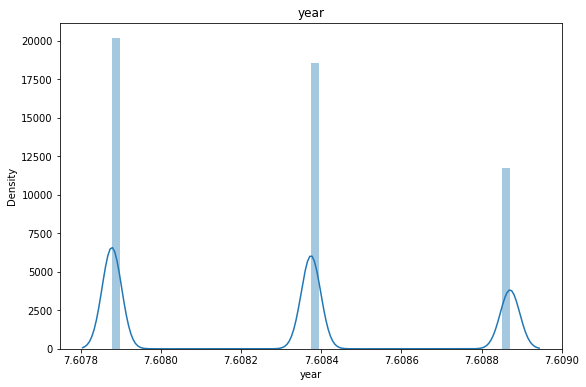

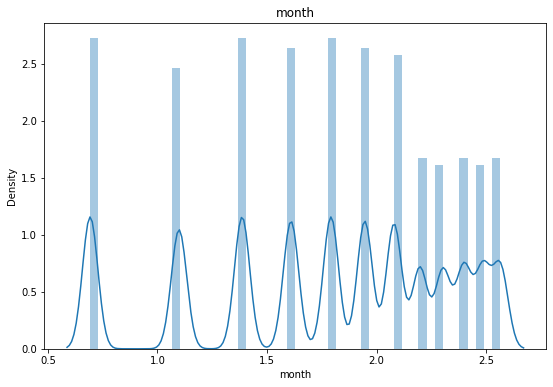

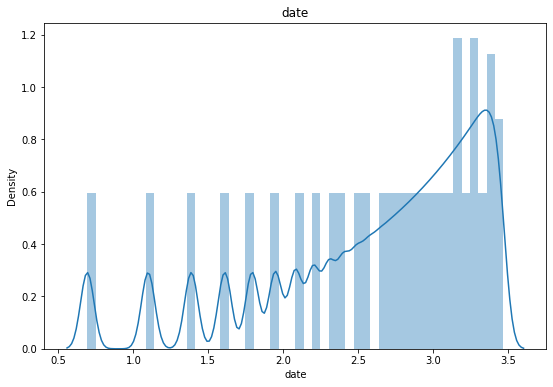

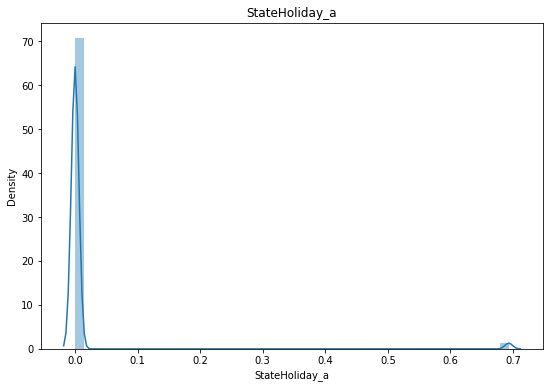

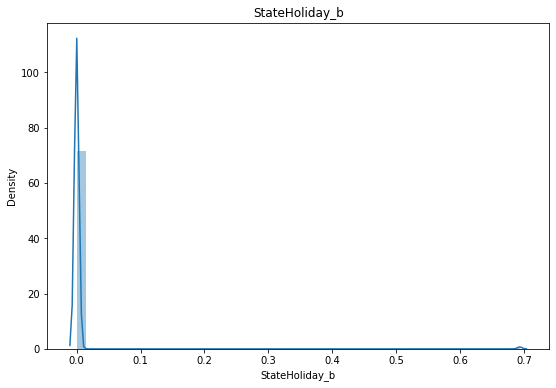

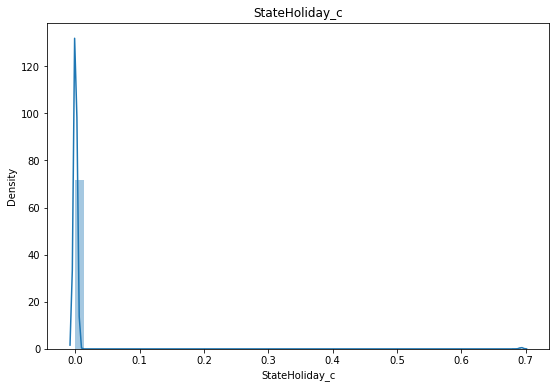

In [ ]:
#printing displots to analyze the distribution of all numerical features

# plot a bar plot for each numerical feature count (except store) with  log1p tranformation.

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log1p(final_df[col])
    sns.distplot(feature,ax = ax)    
    ax.set_title(col)
plt.show()

#now we can see that some of our features like CompititionDistance now more look like normal distribution. rest of our feature still not normaly distributed some of feature has multi mode. beacuse of some features effect the sales like promotion, stateholidays etc.

In [ ]:
numeric_features

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'year',
 'month',
 'date',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c']

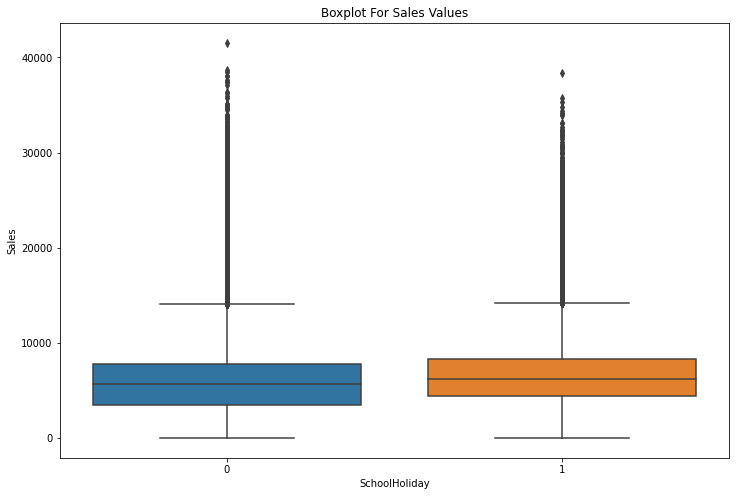

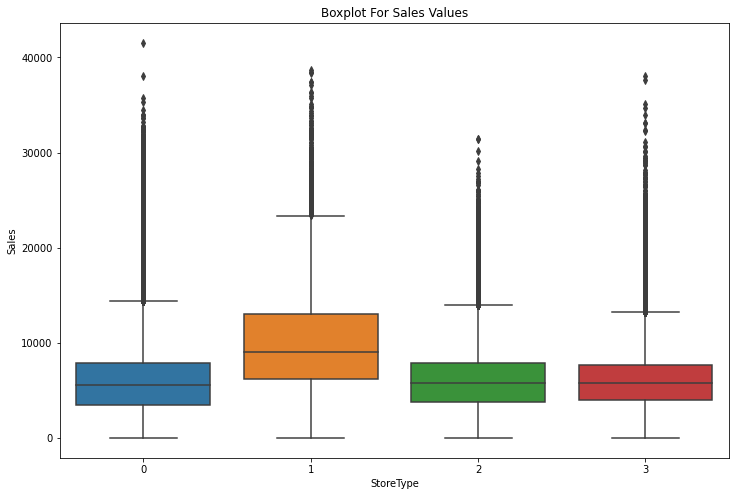

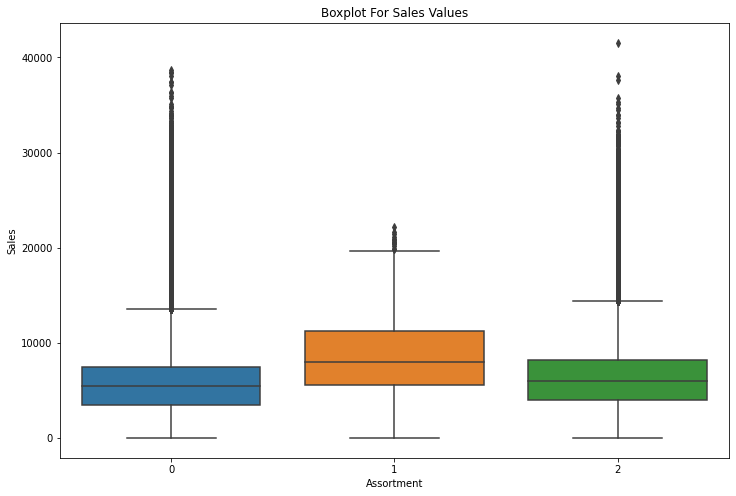

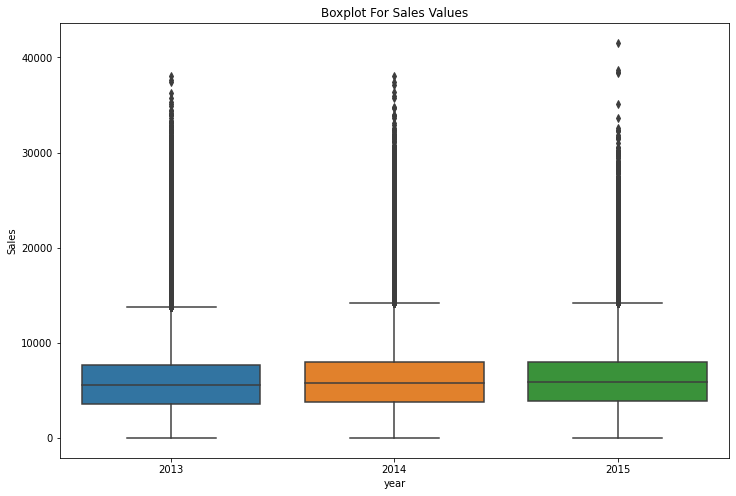

In [ ]:
for col in ['SchoolHoliday','StoreType','Assortment','year']:
  plt.figure(figsize=(12, 8))
  plot_storetype_sales = sns.boxplot(x=col, y="Sales", data=final_df)
  plt.title('Boxplot For Sales Values')
plt.show()

#In this above boxplot we see too many outliers. if we look at the data and apply some domain knowledge . we easily understand that these values are not outliers.
#For Example :-
#if a store start giving discount on some products which means number of sales increase due to some discount. so when we compline our data and plot and box plot on a yearly based data so some of our value shown as outliers.beacuse in some month or an specific occasions store giving some discount.  

#Feature Engineering

In [14]:
final_df.loc[final_df['PromoInterval'] == '0', 'PromoInterval'] = 0

In [15]:
# One hot encoding
final_df = pd.get_dummies(final_df, columns=["PromoInterval"],drop_first=True)

#Checking the correlation of each feature with our dependend feature 'Sales'

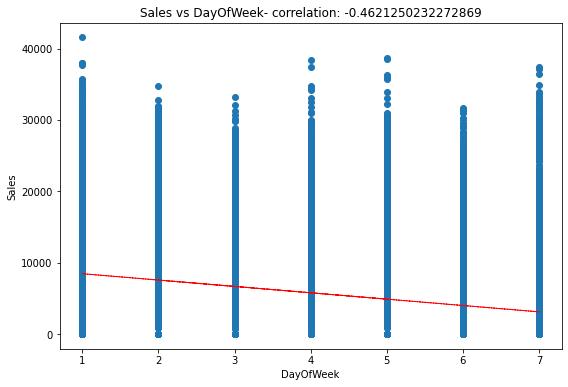

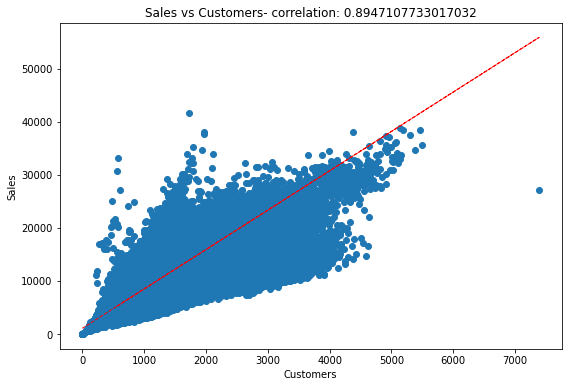

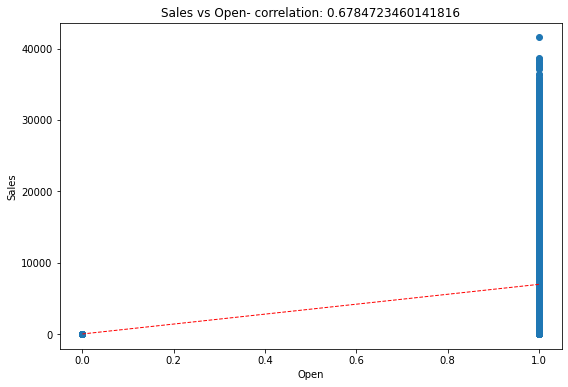

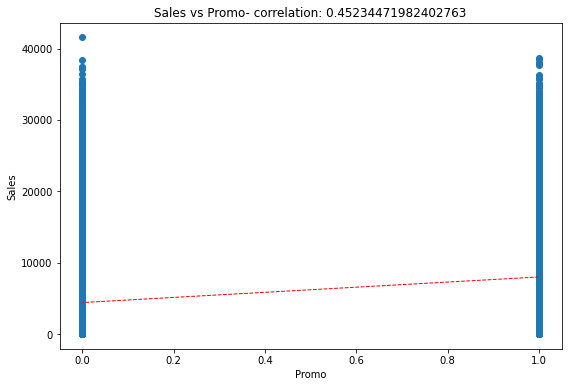

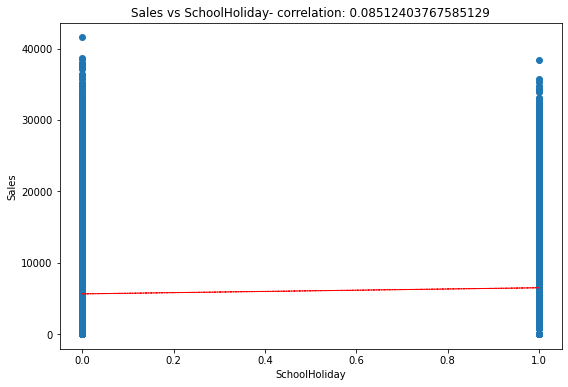

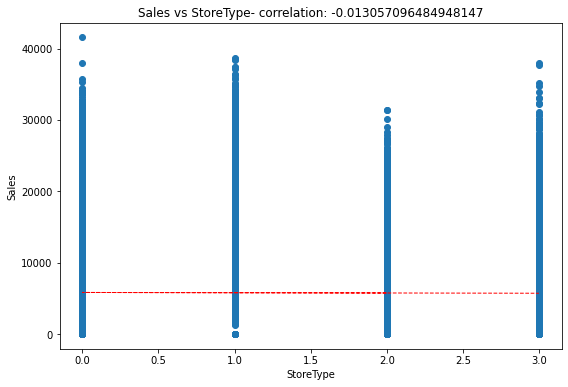

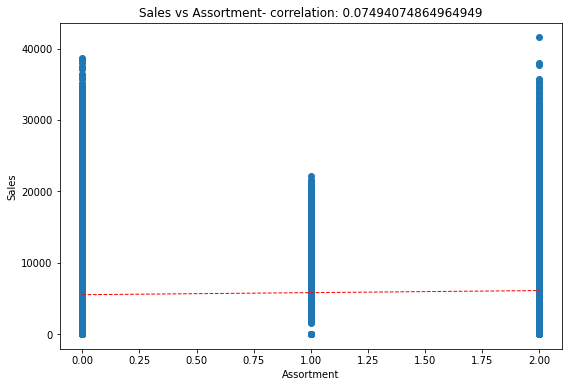

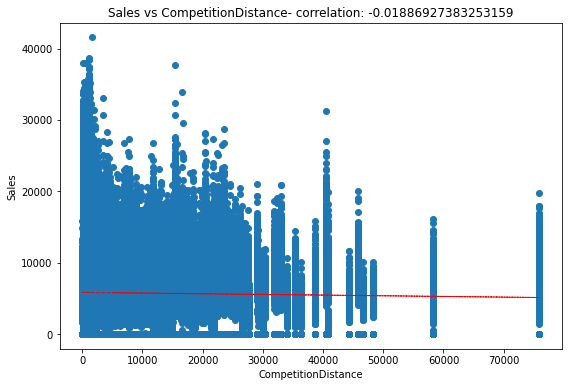

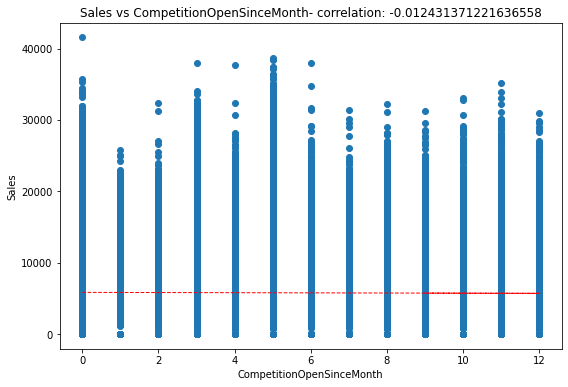

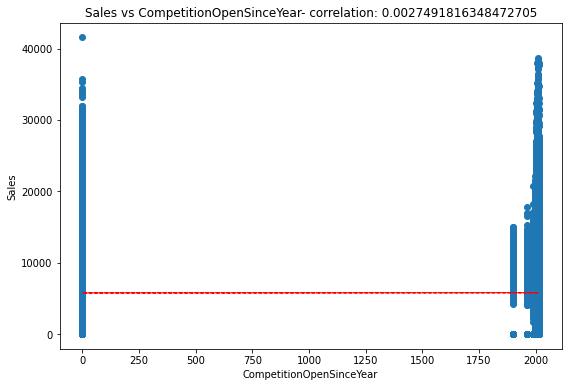

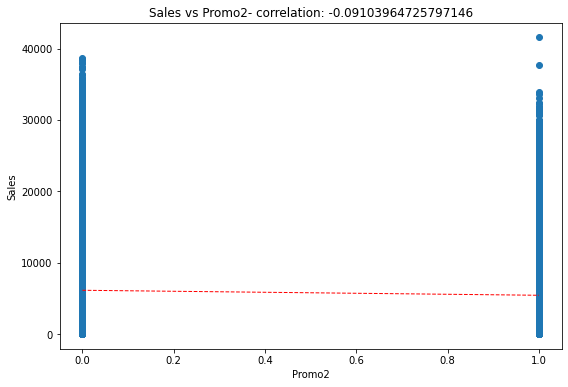

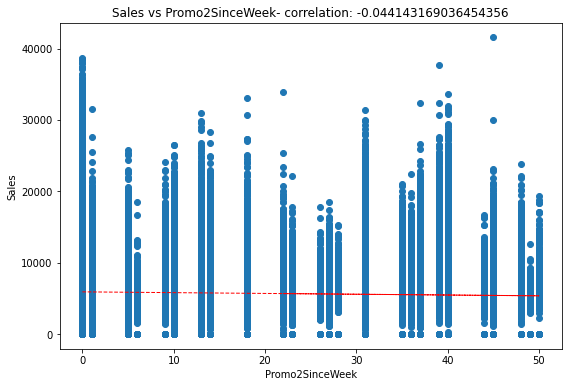

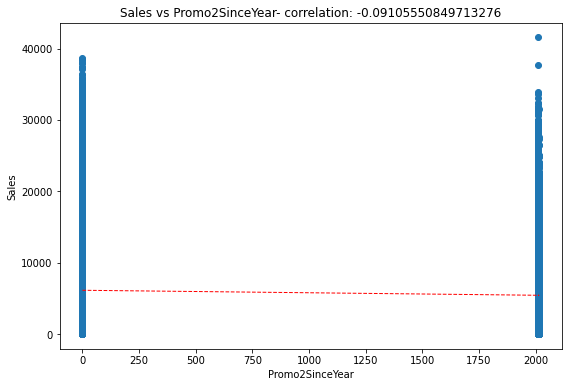

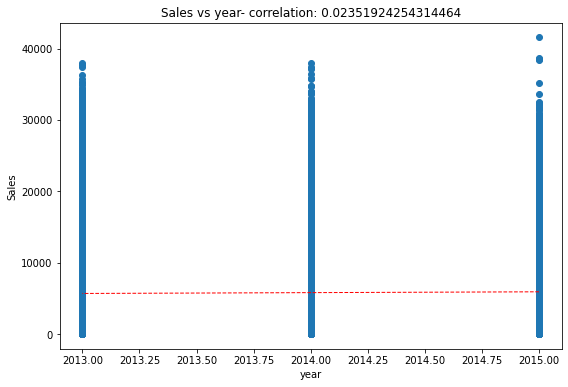

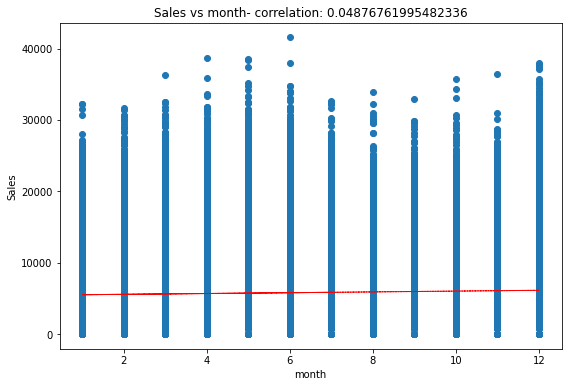

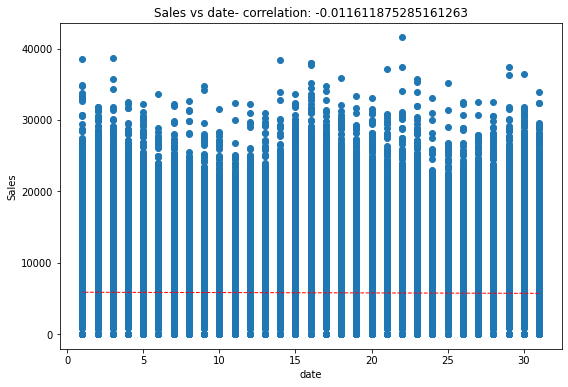

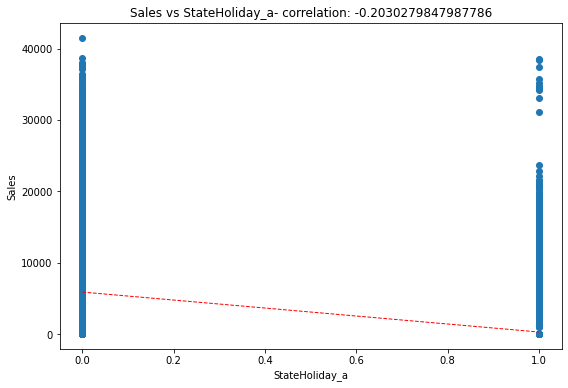

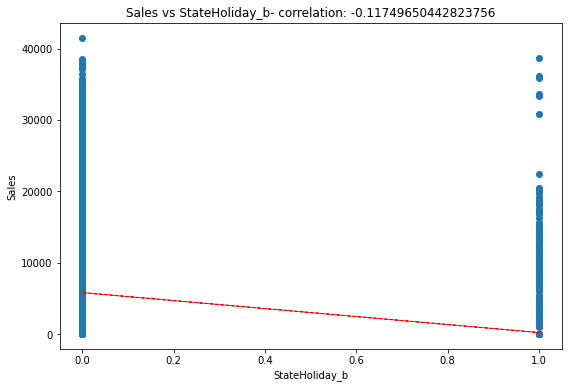

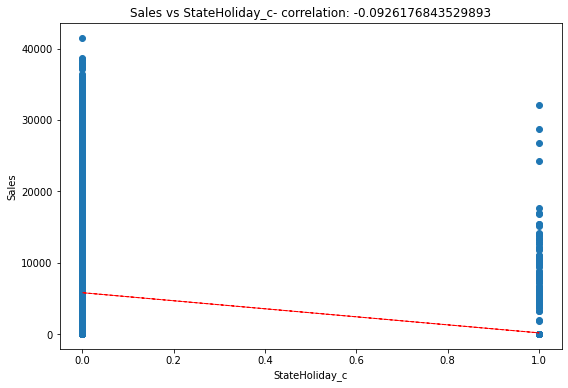

In [ ]:
for col in numeric_features:
  if col not in ['Store','Date','Sales']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final_df[col]
    label = final_df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(final_df[col], final_df['Sales'], 1)
    y_hat = np.poly1d(z)(final_df[col])

    plt.plot(final_df[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
## Correlation heatmap
plt.figure(figsize=(20,12))
correlation = final_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
final_df['DayOfWeek'].value_counts()

#Feature Selection.

#as we observ our dataset in which we have feature name called 'Open' which simply tells us weather a store open or closs. so sales only generated when store is open. So we have to eleminate those rows/ observation in which store is closs or its value = 0. then we have only data of store which is open. so we also drop that columns because all the observation values are same as '1'.

In [16]:
final_df[(final_df['Open'] == 0) & (final_df['Sales'] == 0)].count()[0]

172817

In [17]:
final_df = final_df.drop(final_df[(final_df['Open'] == 0) & (final_df['Sales'] == 0)].index)

In [18]:
final_df = final_df.copy()

In [ ]:
#Multicollinearity

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Store','Sales','Open']]])

,variables,VIF
0,DayOfWeek,5.768832e+00
1,Customers,5.423151e+00
2,Promo,2.064986e+00
3,SchoolHoliday,1.285629e+00
4,StoreType,1.980040e+00
5,Assortment,2.097852e+00
6,CompetitionDistance,1.626129e+00
7,CompetitionOpenSinceMonth,6.150249e+00
8,CompetitionOpenSinceYear,8.422304e+00
9,Promo2,inf


#The Multicollinearity of 'Promo2SinceYear','year' and 'Promo2' are very high so we decided to drop these column for our linear Regression model.
#Because the the multicollinearity of each independeble feature should be under 10.

In [ ]:
#Checking multicollinearity 
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Store','Sales','Promo2SinceYear','Open','year','Promo2']]])

,variables,VIF
0,DayOfWeek,4.245319
1,Customers,4.243036
2,Promo,1.916050
3,SchoolHoliday,1.273115
4,StoreType,1.891109
5,Assortment,2.060638
6,CompetitionDistance,1.547258
7,CompetitionOpenSinceMonth,6.144136
8,CompetitionOpenSinceYear,8.104633
9,Promo2SinceWeek,3.766023


In [ ]:
final_df.shape

(844392, 25)

In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final_df.columns.drop(['Store','Promo2SinceYear','year','Open','Promo2','Sales','Date'])

#Creating the X,y values for our algorithm.

In [ ]:
# Create the data of independent variables
X = final_df[indep_var].values

# Create the dependent variable data
y = final_df[dep_var].values

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(675513, 18)
(168879, 18)


In [ ]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = reg.predict(X_test)
y_pred

array([11599.90650661,  5940.68982374,  7617.64710006, ...,
        7834.60815367,  9215.90251677,  4808.04543391])

In [ ]:
#check the score
reg.score(X_train, y_train)

0.7633097881409867

In [ ]:
#check the coefficeint
reg.coef_

array([-117.33203686, 2547.15898394,  643.81937936,   14.31789721,
        377.22449221,  220.47981285,  227.22156142,  -11.65673985,
         89.63774194,  191.50617518,   99.39309785,   11.03129185,
        -53.6735691 ,  -35.70339165,  -17.64496904,  -17.56142073,
         22.49384468,  -86.8899638 ])

In [ ]:
#check the intercept
reg.intercept_

6956.38991551606

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

#checking the metrics on train set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_train,y_pred_train)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2278086.4811305497
RMSE : 1509.333124638345
MAE : 1043.8238920694405
R2 : 0.7633097881409867
Adjusted R2 : 0.7632845576316094


#Looks like our r2 score value is 0.76 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

#checking the metrics on test set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 2291217.64177334
RMSE : 1513.676861742076
MAE : 1045.1896971022138
R2 : 0.7633438459068649
Adjusted R2 : 0.7633186190279494


#The r2_score for the test set is 0.76. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

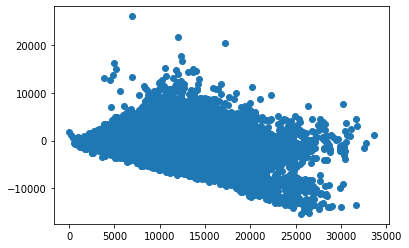

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

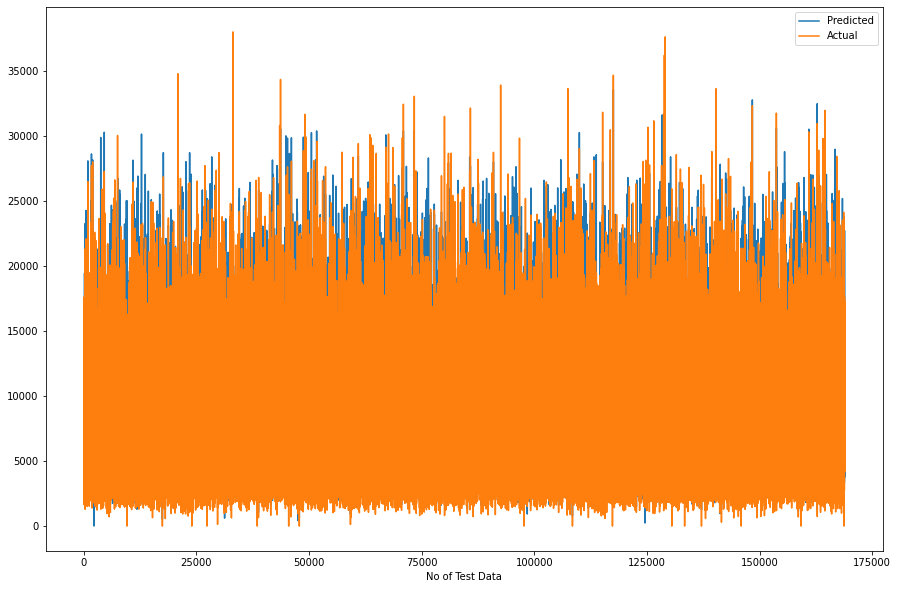

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#Now doing Regularization with the help of Lasso(L1), Ridge(L2) and Elastic net.

#LASSO REGRESSION

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.7633438463773322 0.7633097881409595


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

#checking the metrics on train set

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2278086.4811308114
RMSE : 1509.3331246384316
MAE : 1043.823889685008
R2 : 0.7633097881409595
Adjusted R2 : 0.7632845576315821


#Looks like our r2 score value is 0.76 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

#checking the metrics on test set

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2291217.6372184474
RMSE : 1513.676860237497
MAE : 1045.1896945782855
R2 : 0.7633438463773322
Adjusted R2 : 0.7633186194984669


The r2_score for the test set is 0.76. This means our linear model performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

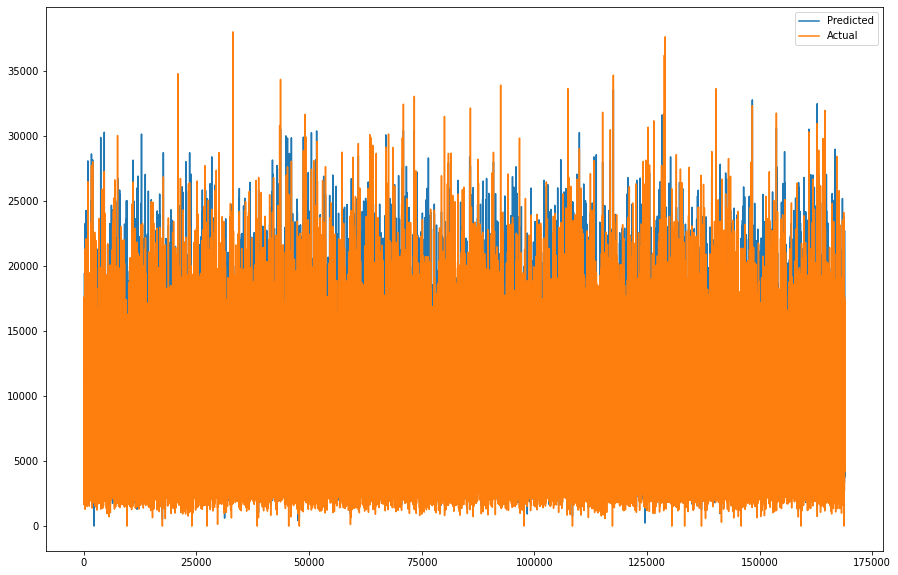

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

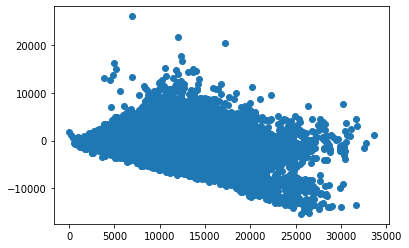

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

#LASSO REGRESSION WITH CROSS VALIDATION.

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -2278259.5265802327


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso_regressor.predict(X_train)
y_pred_test_lasso=lasso_regressor.predict(X_test)

#checking the metrics on train set

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2278086.4811305483
RMSE : 1509.3331246383445
MAE : 1043.8238920694373
R2 : 0.7633097881409868
Adjusted R2 : 0.7632845576316094


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression with cross validation ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

Checking the metric on test set

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2291217.6417733356
RMSE : 1513.6768617420746
MAE : 1045.1896971022109
R2 : 0.7633438459068653
Adjusted R2 : 0.7633186190279498


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression with cross validation ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

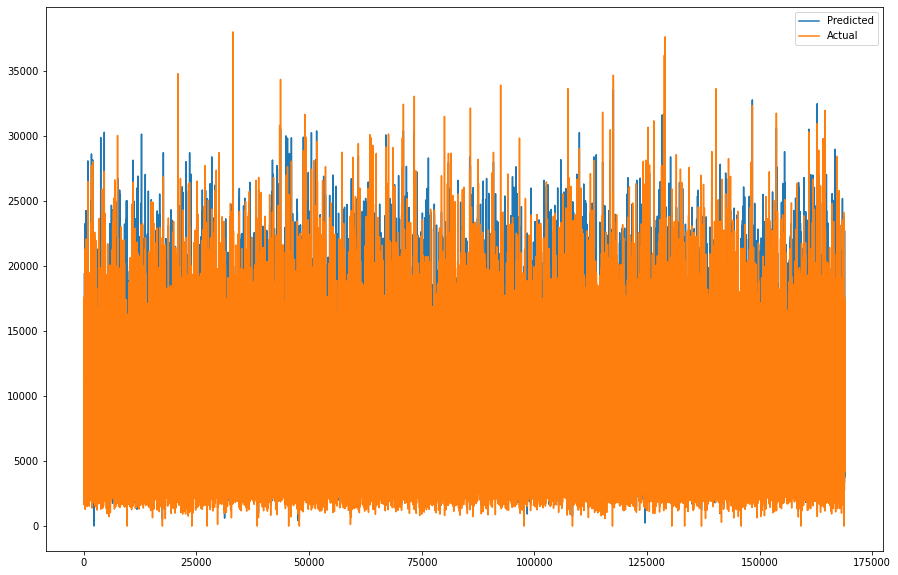

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

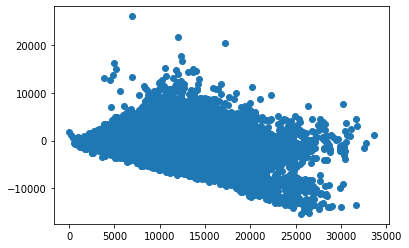

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

#RIDGE REGRESSION

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.01)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.7633097881409865

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

#checking the metrics on train set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2278086.481130551
RMSE : 1509.3331246383455
MAE : 1043.8238963016388
R2 : 0.7633097881409865
Adjusted R2 : 0.7632845576316092


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

#Checking the metric score on test set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2291217.641400877
RMSE : 1513.6768616190434
MAE : 1045.1897013615076
R2 : 0.7633438459453359
Adjusted R2 : 0.7633186190664245


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

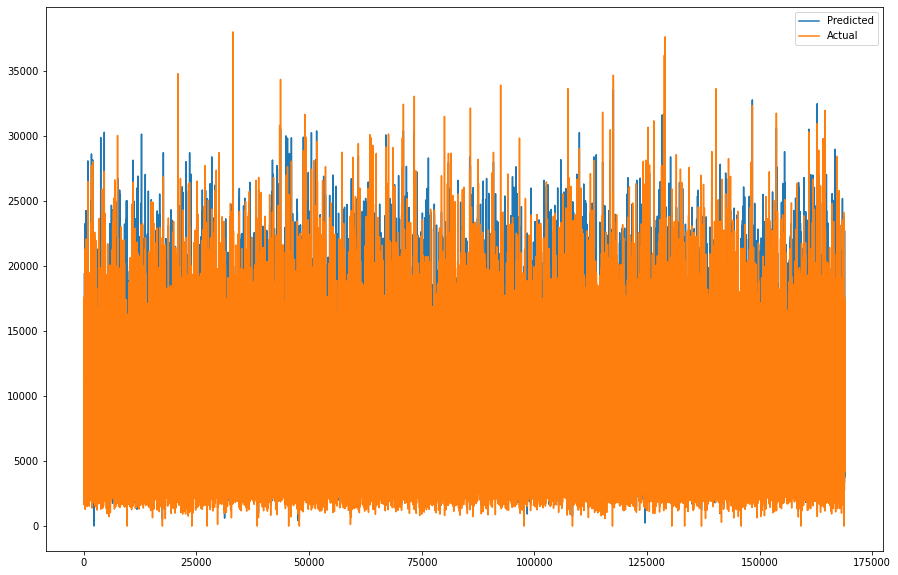

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

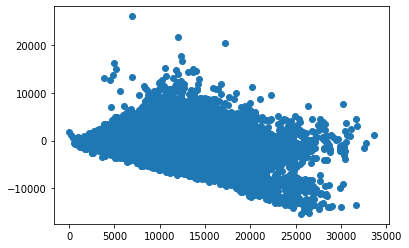

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

#RIDGE REGRESSOR WITH CROSS VALIDATION>

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -2278299.008401157


In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge_regressor.predict(X_train)
y_pred_test_ridge=ridge_regressor.predict(X_test)

#checking the metrics on train set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2278086.488270658
RMSE : 1509.3331270036638
MAE : 1043.8323584319985
R2 : 0.7633097873991388
Adjusted R2 : 0.763283155036994


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression with cross validation',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

#Checking the metric score on test set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2291216.9040736104
RMSE : 1513.6766180639809
MAE : 1045.1982174852749
R2 : 0.7633439221026734
Adjusted R2 : 0.7633172935813625


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression with cross validation',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

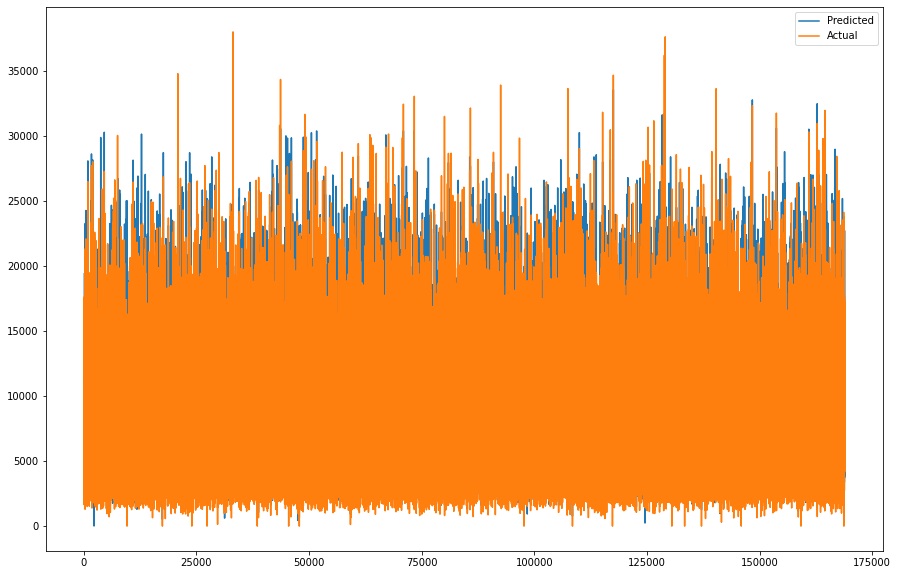

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

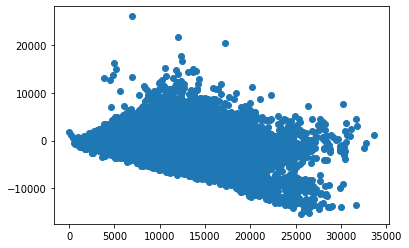

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

#ELASTIC NET REGRESSION

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#check the score
elasticnet.score(X_train, y_train)

0.761434595781772

In [ ]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

#checking the metric on train set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2296134.7575231153
RMSE : 1515.3002202610264
MAE : 1061.5868965053928
R2 : 0.761434595781772
Adjusted R2 : 0.7614077524232293


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

#Checking the matrics on test set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2308242.850502901
RMSE : 1519.2902456419909
MAE : 1062.9749804810658
R2 : 0.7615853397103726
Adjusted R2 : 0.7615585133135236


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

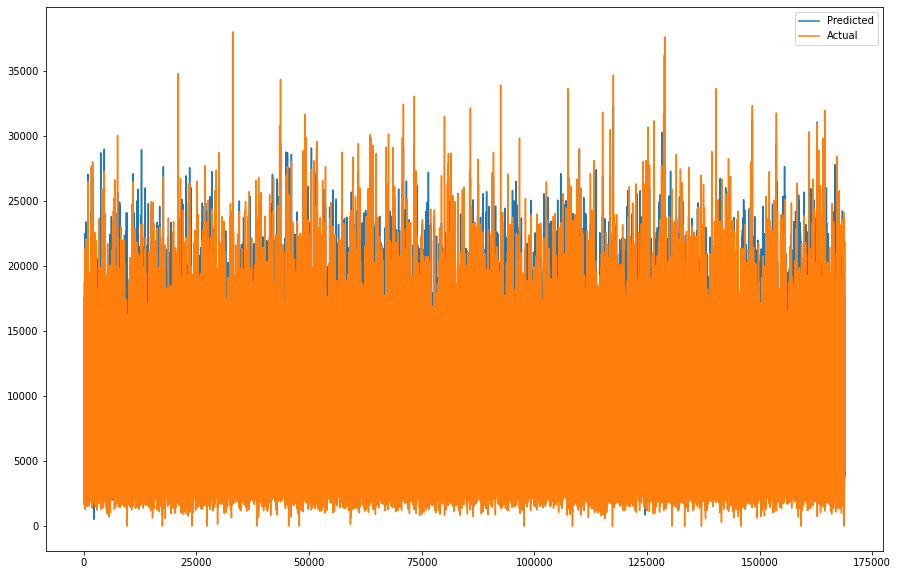

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

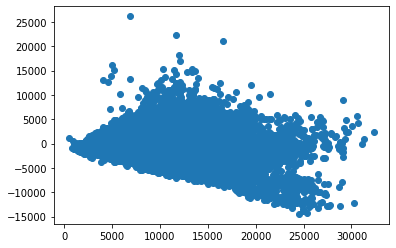

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

#ELASTIC NET REGRESSOR WITH CROSS VALIDATION>

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
#get the X_train and X-test value
y_pred_train_en=elastic_regressor.predict(X_train)
y_pred_test_en=elastic_regressor.predict(X_test)

#checking the metric on train set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2278086.488484043
RMSE : 1509.3331270743524
MAE : 1043.8324691589723
R2 : 0.7633097873769683
Adjusted R2 : 0.7632831550148209


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

#Checking the matrics on test set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 2291216.891215073
RMSE : 1513.6766138165287
MAE : 1045.1983287803048
R2 : 0.7633439234308108
Adjusted R2 : 0.7633172949096493


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

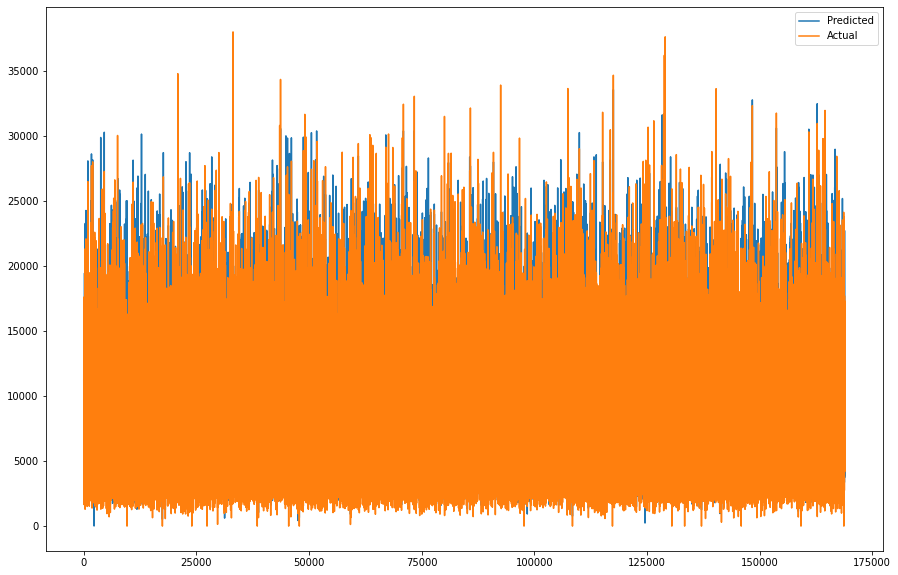

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

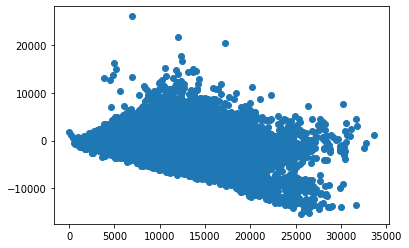

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

#Now we will use Desision tree algorithm.
#Which doesn't care whether the multicolinearity is high or low. So we gonna use all the feature which we have in our dataset.

#DECISION TREE

In [19]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final_df.columns.drop(['Store','Promo2','Date','Sales'])

In [20]:
# Create the data of independent variables
X = final_df[indep_var]

# Create the dependent variable data
y = final_df[dep_var]

In [21]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(675513, 21)
(168879, 21)


In [22]:
X_train_with_coumns = X_train

In [23]:
# Transforming data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=10, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=10,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8179512441577985
MSE : 1752175.5814633714
RMSE : 1323.6976926259906
MAE : 972.9731986348665
R2 : 0.8179512441577985
Adjusted R2 : 0.8179286035573337


**Looks like our r2 score value is 0.69 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

#Checking the metric on test set

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 1772242.5893541954
RMSE : 1331.256019462145
MAE : 975.8877099002684
R2 : 0.8169479373456596
Adjusted R2 : 0.8169251719683537


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

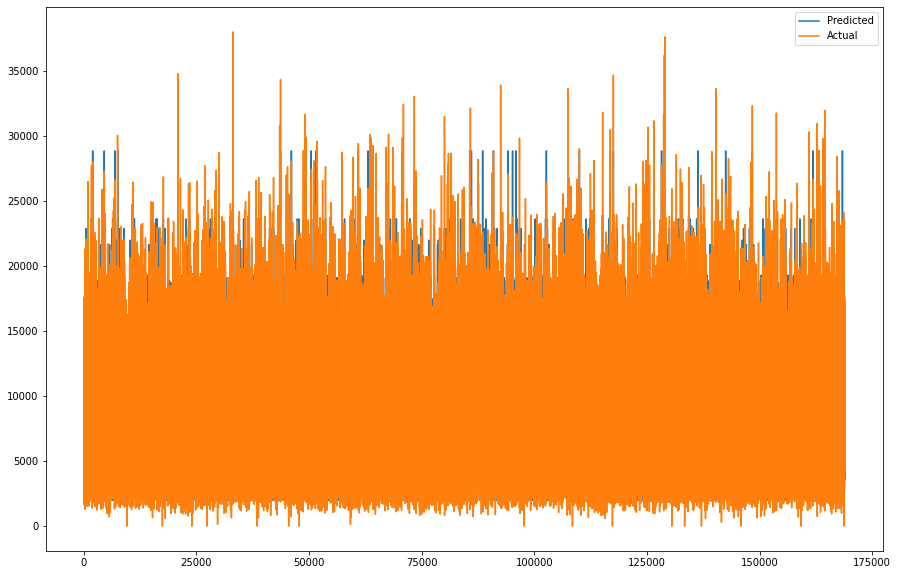

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

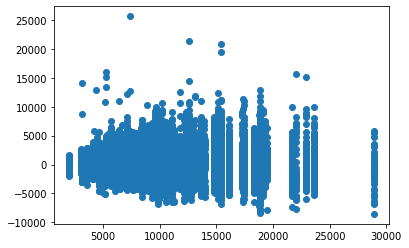

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

# **RANDOM FOREST**

In [24]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [25]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


#Checking the metrics on train set

In [26]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9965301661698466
MSE : 33396.31782048708
RMSE : 182.74659455236664
MAE : 120.76589036209022
R2 : 0.9965301661698466
Adjusted R2 : 0.996529734641924


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

#Checking the metrics on test set

In [27]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 241275.75001896924
RMSE : 491.1982797394238
MAE : 322.8124356334023
R2 : 0.9750790191056522
Adjusted R2 : 0.9750759197932235


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

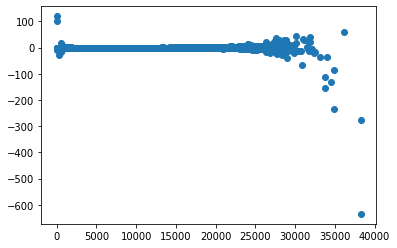

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [28]:
rf_model.feature_importances_

array([1.11624311e-02, 7.36565654e-01, 0.00000000e+00, 3.47259255e-02,
       8.79990822e-04, 5.61531585e-02, 1.43145722e-02, 6.72792660e-02,
       1.47185777e-02, 2.04663732e-02, 1.37047205e-02, 8.04199859e-03,
       3.08829078e-03, 7.12736721e-03, 6.95442709e-03, 1.57546846e-04,
       4.72880296e-05, 2.55610613e-05, 1.23836453e-03, 2.31212476e-03,
       1.03636192e-03])

In [29]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train_with_coumns.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [32]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [33]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,Customers,1.0
0,DayOfWeek,0.0
11,Promo2SinceYear,0.0
19,"PromoInterval_Jan,Apr,Jul,Oct",0.0
18,"PromoInterval_Feb,May,Aug,Nov",0.0
17,StateHoliday_c,0.0
16,StateHoliday_b,0.0
15,StateHoliday_a,0.0
14,date,0.0
13,month,0.0


In [34]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
features = X_train_with_coumns.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

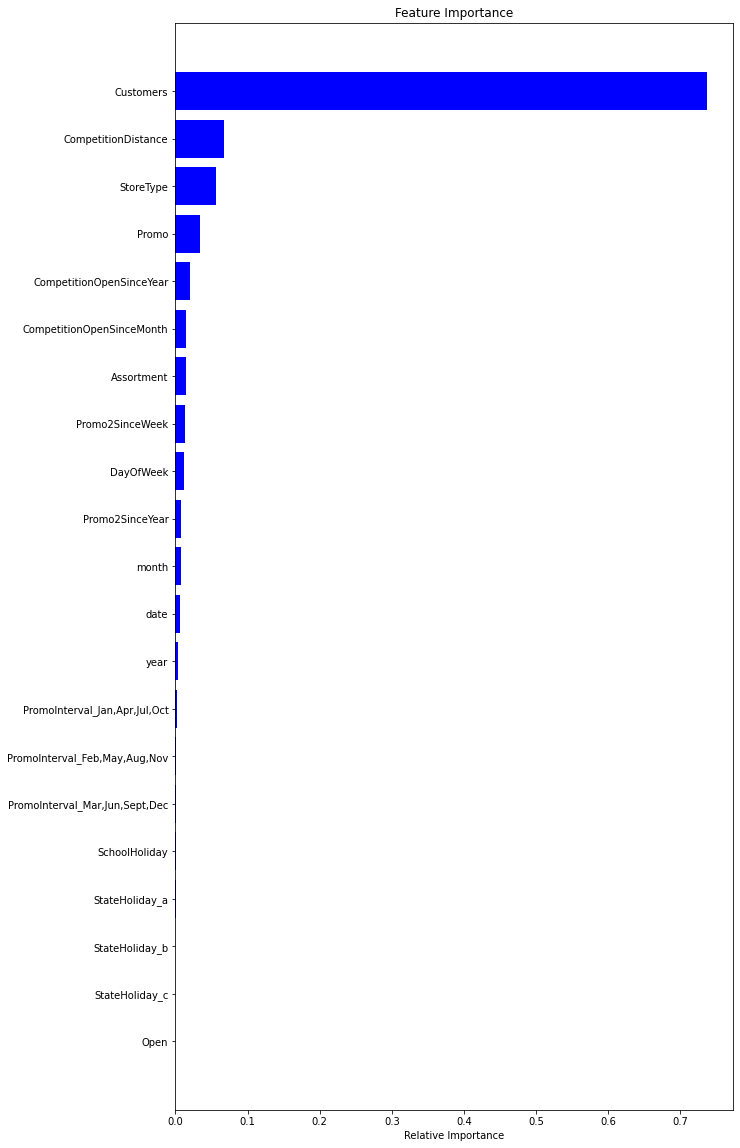

In [37]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#Random Forest With BayesSearchCv.

In [24]:
rf_model = RandomForestRegressor()
rf_bayes = BayesSearchCV(estimator=rf_model,
                       search_spaces = {
                          'max_depth': Integer(4,8),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,100)
                        },
                       cv = 5, verbose=2, scoring='neg_mean_squared_error')

rf_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=5, min_samples_leaf=36, min_samples_split=60, n_estimators=15; total time=  13.1s
[CV] END max_depth=5, min_samples_leaf=36, min_samples_split=60, n_estimators=15; total time=  13.0s
[CV] END max_depth=5, min_samples_leaf=36, min_samples_split=60, n_estimators=15; total time=  13.1s
[CV] END max_depth=5, min_samples_leaf=36, min_samples_split=60, n_estimators=15; total time=  13.8s
[CV] END max_depth=5, min_samples_leaf=36, min_samples_split=60, n_estimators=15; total time=  13.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=5, min_samples_leaf=51, min_samples_split=85, n_estimators=12; total time=  10.4s
[CV] END max_depth=5, min_samples_leaf=51, min_samples_split=85, n_estimators=12; total time=  10.0s
[CV] END max_depth=5, min_samples_leaf=51, min_samples_split=85, n_estimators=12; total time=  10.0s
[CV] END max_depth=5, min_samples_leaf=51, min_samples_split=85, n_estimat

KeyboardInterrupt: ignored